In [1]:
from datetime import datetime, timedelta
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)

sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)
import requests
from creds import api_key

import tensorflow as tf
import tensorflow_probability as tfp
from pandasgui import show

tf.distribute.OneDeviceStrategy(device="/gpu:0")

In [4]:
def compile_lc_data(num_days=100, coins="ETH"):
    intervals = ["1d", "1w", "1m", "3m", "6m", "1y", "2y"]
    now = datetime.now()
    delta = timedelta(num_days)
    ut = datetime.timestamp((now - delta))

    payload = {
        "key": api_key,
        "symbol": coins,
        "change": intervals,
        "data_points": "720",
        "start": ut,
        
        # "end": datetime.timestamp(now),
    }

    r = requests.get("https://api.lunarcrush.com/v2?data=assets", params=payload)
    print(r.url)
    # print(r.json())
    data = pd.DataFrame.from_dict(r.json()["data"][0])
    ts = data.timeSeries.to_dict()
    new = pd.DataFrame.from_dict(ts, orient="index")
    new.pop("asset_id")
    new.pop("search_average")
    new["time"] = pd.to_datetime(new["time"], unit="s")
    new.set_index("time", inplace=True)
    new.sort_index(ascending=True, inplace=True)
    new["month"] = [new.index[i].month for i in range(len(new))]
    new["day"] = [new.index[i].day for i in range(len(new))]
    new["hour"] = [new.index[i].hour for i in range(len(new))]
    new.fillna(new.mean(), inplace=True)

    return new


df = compile_lc_data()
print(df.isna().sum().sum())
print(df.index.max())
print(df.index.min())
df.tail()


https://api.lunarcrush.com/v2?data=assets&key=ru1zaf0ssaa29394mb4ahp&symbol=ETH&change=1d&change=1w&change=1m&change=3m&change=6m&change=1y&change=2y&data_points=720&start=1626586954.295639
0
2021-08-17 05:00:00
2021-07-18 06:00:00


,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance,percent_change_24h,month,day,hour
time,,,,,,,,,,,,,,,,,,,,,
2021-08-17 01:00:00,3139.761912,3179.462301,3182.182764,3138.543819,1.572350e+09,372060486171,529,272,37.0,440.0,...,2878,0.068600,56348,5.107546,2142161972560,17.368457,-4.018101,8,17,1
2021-08-17 02:00:00,3180.878295,3198.536384,3199.727077,3174.424613,1.152643e+09,374535654856,654,319,40.0,157.0,...,3315,0.068757,56203,5.898262,2151961698547,17.404383,-3.662531,8,17,2
2021-08-17 03:00:00,3197.676353,3198.998794,3212.707827,3184.497353,1.324026e+09,374690922728,639,310,20.0,170.0,...,3087,0.068809,60209,5.127140,2159923806715,17.347414,-2.013159,8,17,3
2021-08-17 04:00:00,3199.206427,3196.827627,3218.532602,3190.825275,1.248667e+09,374770431412,574,306,28.0,726.0,...,2658,0.068833,56070,4.740503,2157259098075,17.372528,-2.557348,8,17,4
2021-08-17 05:00:00,3197.956905,3179.306522,3203.446906,3175.862523,1.622100e+09,373082033586,753,461,39.0,467.0,...,2969,0.068927,54441,5.453610,2137909490256,17.450787,-3.718966,8,17,5


In [3]:
train_ds = df.sample(frac=0.8, random_state=0)
test_ds = df.drop(train_ds.index)

train_features = train_ds.copy()
test_features = test_ds.copy()

train_label = train_features.pop("close")
test_labels = test_features.pop("close")


# ds = tf.data.Dataset.from_tensor_slices((features, label)).batch(32)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features).astype("float32"))

linear_model = tf.keras.models.Sequential([normalizer, tf.keras.layers.Dense(1)])
optimizer = tf.keras.optimizers.Adam()

linear_model.compile(optimizer=optimizer, loss="mse")


In [4]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(58, 1) dtype=float32, numpy=
array([[-0.3004485 ],
       [-0.26289377],
       [-0.00128037],
       [ 0.24445736],
       [ 0.27752304],
       [-0.2999052 ],
       [-0.165909  ],
       [ 0.17040107],
       [-0.05109468],
       [-0.06189838],
       [ 0.03506061],
       [-0.13656278],
       [-0.02032813],
       [ 0.2562182 ],
       [-0.26320922],
       [ 0.07644382],
       [-0.16917817],
       [-0.17606756],
       [-0.3119776 ],
       [-0.0379571 ],
       [ 0.27487564],
       [-0.16923405],
       [-0.06943926],
       [-0.03104264],
       [ 0.05635193],
       [ 0.16255239],
       [-0.04242444],
       [ 0.0940147 ],
       [ 0.04281959],
       [ 0.15197036],
       [ 0.13552085],
       [ 0.06689322],
       [ 0.16213483],
       [ 0.12362188],
       [ 0.26082253],
       [-0.03940722],
       [ 0.19352949],
       [ 0.04616386],
       [ 0.04315075],
       [ 0.27530718],
       [-0.18275136],
       [ 0.11564615],
       [-0

In [5]:
%%time
early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=4, mode="min"
    )
history = linear_model.fit(
    train_features,
    train_label,
    epochs=2000,
    validation_split=.2,
    callbacks=[early_stopping],
    
)

Epoch 1/20
15/15 [==============================] - 1s 11ms/step - loss: 12863310.0000 - val_loss: 13087858.0000
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 12862960.0000 - val_loss: 13087573.0000
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 12862639.0000 - val_loss: 13087283.0000
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 12862319.0000 - val_loss: 13087002.0000
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 12861994.0000 - val_loss: 13086702.0000
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 12861672.0000 - val_loss: 13086417.0000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 12861347.0000 - val_loss: 13086146.0000
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 12861021.0000 - val_loss: 13085868.0000
Epoch 9/20
15/15 [==============================] - 0s 4ms/step - loss: 12860704.0000 - val_loss: 13085

In [6]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()


,loss,val_loss,epoch
15,12858450.0,13083599.0,15
16,12858120.0,13083329.0,16
17,12857793.0,13083021.0,17
18,12857471.0,13082729.0,18
19,12857143.0,13082439.0,19


In [7]:
test_results = {}

test_results["linear_baseline"] = linear_model.evaluate(
    test_features, test_labels, verbose=0
)


In [8]:
def build_and_compile_model(norm):
    model = tf.keras.models.Sequential(
        [
            norm,
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1),
        ]
    )
    model.compile(
        loss="mse", optimizer="adam", metrics=[tf.metrics.MeanAbsoluteError()]
    )
    return model


In [9]:
dnn_model = build_and_compile_model(normalizer)

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 58)                117       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3776      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,118
Trainable params: 8,001
Non-trainable params: 117
_________________________________________________________________


In [10]:
%%time
history = dnn_model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    epochs=2000, callbacks=[early_stopping])

Epoch 1/2000
15/15 [==============================] - 0s 11ms/step - loss: 12858347.0000 - mean_absolute_error: 3567.2588 - val_loss: 13074611.0000 - val_mean_absolute_error: 3594.1011
Epoch 2/2000
15/15 [==============================] - 0s 6ms/step - loss: 12838979.0000 - mean_absolute_error: 3564.5413 - val_loss: 13052147.0000 - val_mean_absolute_error: 3590.9646
Epoch 3/2000
15/15 [==============================] - 0s 5ms/step - loss: 12810039.0000 - mean_absolute_error: 3560.4766 - val_loss: 13014353.0000 - val_mean_absolute_error: 3585.6929
Epoch 4/2000
15/15 [==============================] - 0s 5ms/step - loss: 12760512.0000 - mean_absolute_error: 3553.5181 - val_loss: 12949472.0000 - val_mean_absolute_error: 3576.6426
Epoch 5/2000
15/15 [==============================] - 0s 6ms/step - loss: 12676611.0000 - mean_absolute_error: 3541.7441 - val_loss: 12843124.0000 - val_mean_absolute_error: 3561.7798
Epoch 6/2000
15/15 [==============================] - 0s 6ms/step - loss: 12543

<AxesSubplot:xlabel='epoch'>

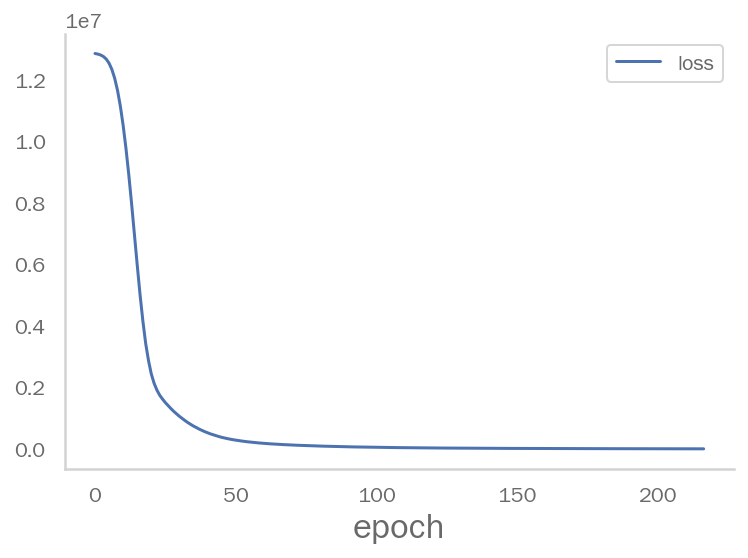

In [11]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.plot(x="epoch", y="loss")


In [12]:
test_results["Simple DNN"] = dnn_model.evaluate(test_features, test_labels)

print(test_results)


5/5 [==============================] - 0s 3ms/step - loss: 36378.3086 - mean_absolute_error: 142.3578
{'linear_baseline': 12721548.0, 'Simple DNN': [36378.30859375, 142.35777282714844]}


In [13]:
test_predictions = {}
test_predictions["dnn_model"] = dnn_model.predict(test_features).flatten()


In [14]:
def conv_model(normalizer):
    CONV_WIDTH = 3

    model = tf.keras.models.Sequential(
        [
            normalizer,
            # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
            tf.keras.layers.Conv1D(
                filters=64,
                kernel_size=(CONV_WIDTH),
                strides=1,
                padding="causal",
                # activation="relu",
            ),
            tf.keras.layers.Bidirectional(
                tf.keras.layers.LSTM(128, return_sequences=False)
            ),
            # tf.keras.layers.Bidirectional(
            #     tf.keras.layers.LSTM(64, return_sequences=True)),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(1),
        ]
    )

    model.compile(
        loss="mse", optimizer="adam", metrics=[tf.metrics.MeanAbsoluteError()]
    )

    return model


In [15]:
conv_model = conv_model(normalizer)

conv_model.summary()


ValueError: Input 0 of layer conv1d is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 58)

In [ ]:
%%time
history = conv_model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    epochs=2000, callbacks=[early_stopping])

In [ ]:
test_results["conv_model"] = dnn_model.evaluate(test_features, test_labels)

print(test_results)


In [ ]:
test_predictions["conv_model"] = dnn_model.predict(test_features).flatten()

print(test_predictions)


In [ ]:
def plot_result(labels, preds):
    plt.figure(figsize=(15, 10))
    plt.scatter(x=labels.index, y=labels, color="r", marker=".", label="real data")
    plt.scatter(x=labels.index, y=preds, color="b", marker="X", label="predictions")
    plt.xlabel("time")
    plt.ylabel("price")
    plt.title("Red is predictions, Blue is real data")
    plt.show()


In [ ]:
plot_result(test_labels, test_predictions["dnn_model"])

In [ ]:
plot_result(test_labels, test_predictions["conv_model"])
